# Week 5 handin

## Assignments

### Exercise 1

Create a module containing a class with the following methods:
1. __init__(self, url_list)
2. download(url,filename) raises NotFoundException when url returns 404
3. multi_download() uses threads to download multiple urls as text and stores filenames as a property
4. __iter__() returns an iterator
5. __next__() returns the next filename (and stops when there are no more)
6. urllist_generator() returns a generator to loop through the urls
7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text
8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

### Exercise 2

Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

## Status

All done

# Exercise 1

All of the subtasks have been implemented in the file called `exercise_6.py`.

# Exercise 2

In [20]:
from exercise_6 import book_handler # Indlæser mit modul
import matplotlib.pyplot as plt # Skal bruges til at plotte senere

urls = [] # Opretter et arrays til mit modul
urls.append("https://www.gutenberg.org/files/84/84-0.txt")
urls.append("https://www.gutenberg.org/files/1342/1342-0.txt")
urls.append("https://www.gutenberg.org/files/64317/64317-0.txt")
urls.append("https://www.gutenberg.org/files/1080/1080-0.txt")
urls.append("https://www.gutenberg.org/files/2542/2542-0.txt")
urls.append("https://www.gutenberg.org/files/11/11-0.txt")
urls.append("https://www.gutenberg.org/files/98/98-0.txt")
urls.append("https://www.gutenberg.org/files/844/844-0.txt")
urls.append("https://www.gutenberg.org/cache/epub/5200/pg5200.txt")
urls.append("https://www.gutenberg.org/files/2701/2701-0.txt")

books = book_handler(urls)

In [3]:
# Downloader alle bøgerne
books.multi_download()

In [4]:
# Finder den bog der er sværest af læse
book = books.hardest_read()
print(book)

3.txt


In [5]:
# Benytter klassens iterator
[filename for filename in books]

['5.txt',
 '7.txt',
 '3.txt',
 '8.txt',
 '4.txt',
 '1.txt',
 '2.txt',
 '9.txt',
 '0.txt',
 '6.txt']

In [6]:
# Benytter klassens generator
[filename for filename in books.urllist_generator()]

['https://www.gutenberg.org/files/84/84-0.txt',
 'https://www.gutenberg.org/files/1342/1342-0.txt',
 'https://www.gutenberg.org/files/64317/64317-0.txt',
 'https://www.gutenberg.org/files/1080/1080-0.txt',
 'https://www.gutenberg.org/files/2542/2542-0.txt',
 'https://www.gutenberg.org/files/11/11-0.txt',
 'https://www.gutenberg.org/files/98/98-0.txt',
 'https://www.gutenberg.org/files/844/844-0.txt',
 'https://www.gutenberg.org/cache/epub/5200/pg5200.txt',
 'https://www.gutenberg.org/files/2701/2701-0.txt']

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

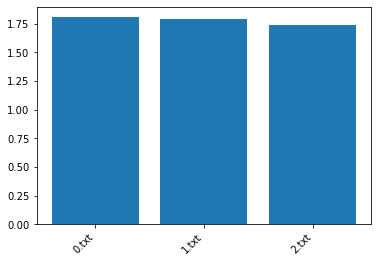

In [31]:
# Downloader tre bøger og laver et bar plot
urls.clear()
urls.append("https://www.gutenberg.org/files/84/84-0.txt")
urls.append("https://www.gutenberg.org/files/1342/1342-0.txt")
urls.append("https://www.gutenberg.org/files/64317/64317-0.txt")

books = book_handler(urls)
books.multi_download()

book_data = {}

for filename in books:
    book_data[filename], _ = books.avg_vowels(filename)

book_data = sorted(book_data.items())

book_keys = []
book_values = []

for book in book_data:
    book_keys.append(book[0])
    book_values.append(book[1])

plt.bar(book_keys, book_values, align = 'center')
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light')